# Lab session 2: Fast Wavelet Transform, image compression and denoising

Name(s): Gaux Antoine, Gouinguenet Arthur

## Prerequisite

### Install Anaconda and PyWavelet

* The simplest is to download the Anaconda distribution (including PyWavelet) : https://www.anaconda.com/ 
* Or follows these instructions: https://pywavelets.readthedocs.io/en/latest/install.html
* Read the documentation on Pywavelet: https://pywavelets.readthedocs.io/_/downloads/en/v0.5.1/pdf/
* Code available on Github (to know how it is implemented): https://github.com/PyWavelets/pywt/tree/580d79d9440ec0f4f936892e39c79ad13a8fd33b 

### Instructions

* Fill empty codes and answer the questions in the notebook
* Upload on TEIDE an archive (with your NAME in capital letters, separated by an underscore for teams NAME1_NAME2) containing:
    * your completed notebook (the python code .ipynb)
    * the corresponding exported PDF
* **Deadline: December 18 (23h59)**. 

### Mark scheme

* This practical work is graded out of 20 points (but at the end the two lab sessions will represent a quarter of the final mark, i.e each accounting for 2,5 points)
* Hand in overdue: -10% per day
* Plagiarism (e.g copy/paste codes of others students): mark divided by 2

### Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from numpy import random
from math import *

## The 1-D Discrete Wavelet Transform

### Play with the DWT of simple 1-D signals

Let's start with the toy example used in the course (*slides 180-182*):

**Question 1** *(1 point)*. Plot the corresponding piecewise constant function on a uniform grid on $[0,1]$ as in the course (pay attention to the interval limits). 

*Hint: you can use the command* `plt.step`

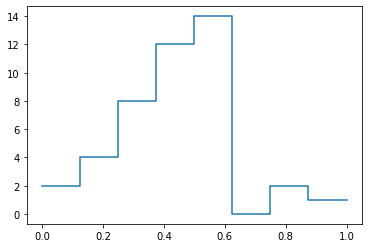

In [3]:
vals = [2, 4, 8, 12, 14, 0, 2, 1]
X=np.linspace(0,1, len(vals)+1)

plt.step(X, [vals[0]]+vals)
plt.show()

**Question 2** *(1 point)*. Compute the 1-D discrete wavelet transform with `pywt.dwt` and the Haar wavelet (see documentation: https://pywavelets.readthedocs.io/en/latest/regression/dwt-idwt.html). Show that to a factor we retrieve the approximation and details coefficients found in the course.

In [6]:
vals = [2, 4, 8, 12, 14, 0, 2, 1]
X=np.linspace(0,1, len(vals)+1)
# DWT
Ca, Cd = pywt.dwt(vals,'haar')
print("Approximation : ", Ca)
print("Detail :        ", Cd)
k1 = 3/Ca[0]
k2 = -1/Cd[0]
print(f"If we multiply the coefficient by {k1}, the coefficient from the course can be recover")
print("Approximation : ", k1*Ca)
print("Detail :        ", k1*Cd)

Approximation :  [ 4.24264069 14.14213562  9.89949494  2.12132034]
Detail :         [-1.41421356 -2.82842712  9.89949494  0.70710678]
If we multiply the coefficient by 0.7071067811865475, the coefficient from the course can be recover
Approximation :  [ 3.  10.   7.   1.5]
Detail :         [-1.  -2.   7.   0.5]


**Question 3** *(2 points)*. Show numerically that it is equivalent to perform a convolution with filters $h=[1,1]/\sqrt{2}$ and $g=[-1,1]/\sqrt{2}$ respectively followed by a decimation. Write the complete decomposition by iterating the procedure on the approximation coefficients (by applying the convolutions or directly `pywt.dwt`).

In [9]:
vals = [2, 4, 8, 12, 14, 0, 2, 1]
X=np.linspace(0,1, len(vals)+1)
    
# Convoulution and décimation
Ca = list()
Cd = list()
h  = [1./sqrt(2), 1./sqrt(2)]
g  = [-1./sqrt(2), 1./sqrt(2)]
for i in range(int(len(vals)/2)):
    Ca.append(h[1]*vals[2*i]+h[0]*vals[2*i+1])
    Cd.append(g[1]*vals[2*i]+g[0]*vals[2*i+1])
print("By doing the convolution and the decimation by the filters h and g, we obtain :")
print(f"Ca = {np.array(Ca)/sqrt(2)}")
print(f"Cd = {np.array(Cd)/sqrt(2)}")

print("We repeat the process to realize a full decomposition : ")
pile = list()
k=1.
while len(vals)>1 :
    vals, details = pywt.dwt(vals, 'haar')
    pile.append(details)
    k = k* 1/sqrt(2)
    diff = 21-len(str(k*vals))
    print(f"value : {k*vals} "+diff*" "+f"| details : {k*details}")

    

    

By doing the convolution and the decimation by the filters h and g, we obtain :
Ca = [ 3.  10.   7.   1.5]
Cd = [-1.  -2.   7.   0.5]
We repeat the process to realize a full decomposition : 
value : [ 3.  10.   7.   1.5] | details : [-1.  -2.   7.   0.5]
value : [6.5  4.25]           | details : [-3.5   2.75]
value : [5.375]               | details : [1.125]


### 1-D Multi-resolution analysis with the Haar wavelet

**Question 4** *(2 points)*. Obtain the same results by computing the multi-resolution analysis of `vals` with `pywt.wavedec`, the Haar wavelet and the option `mode='zero'` (see documentation: https://pywavelets.readthedocs.io/en/latest/regression/multilevel.html and https://pywavelets.readthedocs.io/en/latest/ref/signal-extension-modes.html#modes)  

In [10]:
vals = [2, 4, 8, 12, 14, 0, 2, 1]
X=np.linspace(0,1, len(vals)+1)
haar = pywt.Wavelet("haar")

Ca3, Cd3, Cd2, Cd1 = pywt.wavedec(vals, haar, mode='zero')
print(f"We obtain the same mean value a0 {Ca3/sqrt(2)**3}")
print(f"And we obtain the same details coefficients, for the different level of decomposition : ")
print("Level 1 : ",Cd3/(sqrt(2)**3))
print("Level 2 : ",Cd2/2)
print("Level 3 : ",Cd1/sqrt(2))

We obtain the same mean value a0 [5.375]
And we obtain the same details coefficients, for the different level of decomposition : 
Level 1 :  [1.125]
Level 2 :  [-3.5   2.75]
Level 3 :  [-1.  -2.   7.   0.5]


**Question 5** *(2 points)*. Apply the same decomposition to the `Piece-Regular` signal `f`. Plot the projections of `f` on different approximation and detail spaces as illustrated in the course (*slide 184*).

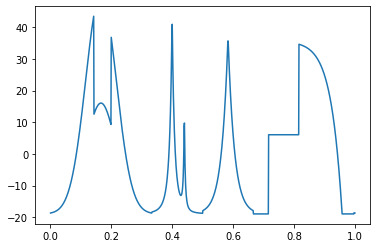

itération n°0, 
Espace d'approximation 10 :


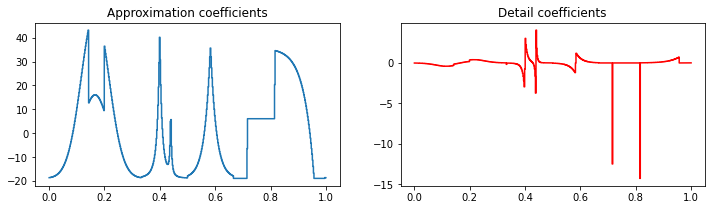

itération n°1, 
Espace d'approximation 9 :


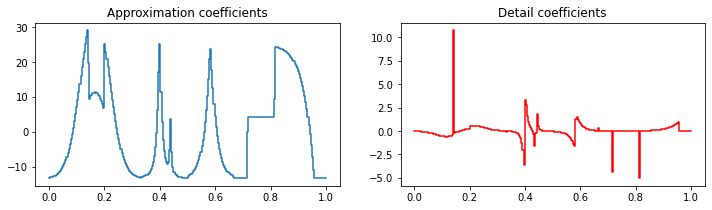

itération n°2, 
Espace d'approximation 8 :


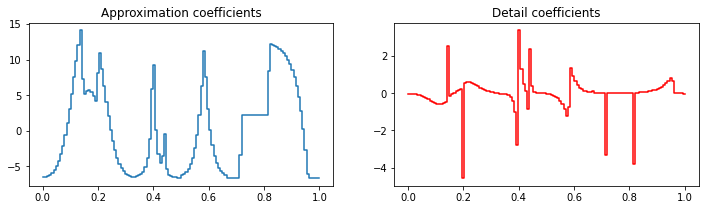

itération n°3, 
Espace d'approximation 7 :


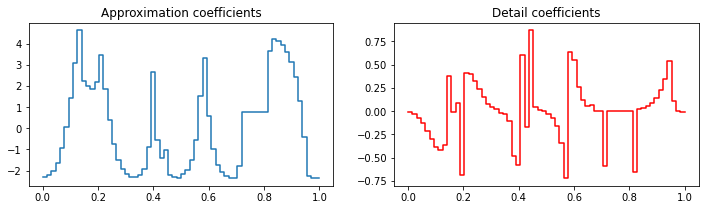

itération n°4, 
Espace d'approximation 6 :


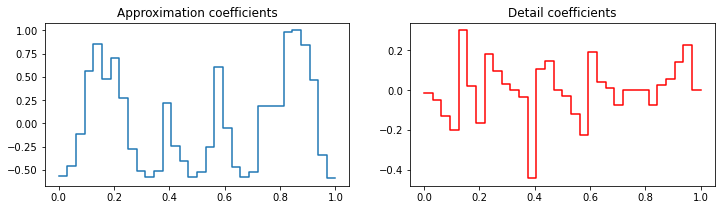

itération n°5, 
Espace d'approximation 5 :


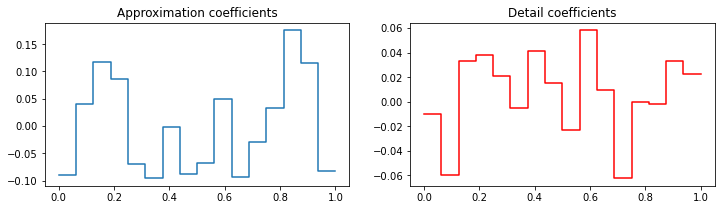

itération n°6, 
Espace d'approximation 4 :


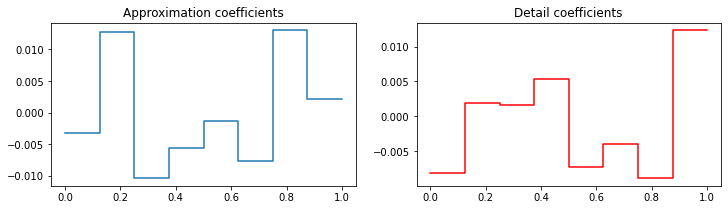

itération n°7, 
Espace d'approximation 3 :


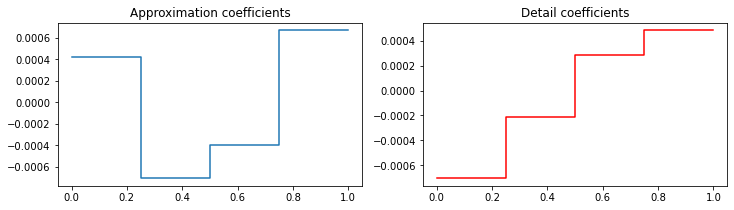

itération n°8, 
Espace d'approximation 2 :


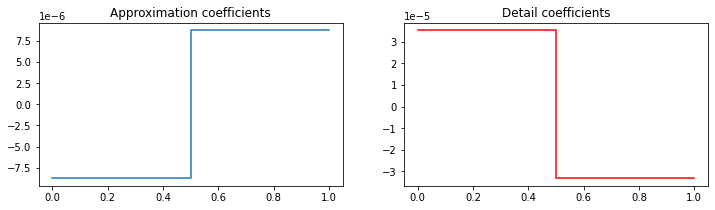

itération n°9, 
Espace d'approximation 1 :


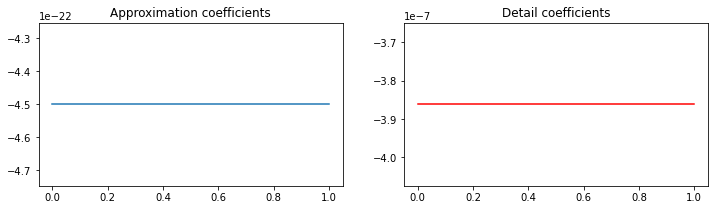

In [48]:
n = 1024
f = pywt.data.demo_signal('Piece-Regular', n)
t = np.arange(1, n + 1)/n
plt.plot(t, f)
plt.show()

k = 1
J = 10
pile = list()


for j in range(J):
    print(f"itération n°{j}, ")
    print(f"Espace d'approximation {J-j} :")
    n = n/2
    f, details = pywt.dwt(f, 'haar')
    pile.append(details)
    k = k* 1/sqrt(2)
    f = k*f
    details = k*details
    t = np.arange(1, n+1)/n
    plt.figure(figsize=(12, 3))
    plt.subplot(121)
    plt.step(np.concatenate(([0.], t)), np.concatenate(([f[0]],f)))
    plt.title("Approximation coefficients")
    plt.subplot(122)
    plt.step(np.concatenate(([0.], t)), np.concatenate(([details[0]],details)), color='red')
    plt.title("Detail coefficients")
    plt.show()
    


### 1-D Multi-resolution analysis with the Debauchies wavelets

In [58]:
w = pywt.Wavelet('db2')
print(w)

Wavelet db2
  Family name:    Daubechies
  Short name:     db
  Filters length: 4
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


The filters used to construct the corresponding scaling and wavelet functions are given by:

In [63]:
fb = w.filter_bank
print(fb)

([-0.12940952255126037, 0.2241438680420134, 0.8365163037378079, 0.48296291314453416], [-0.48296291314453416, 0.8365163037378079, -0.2241438680420134, -0.12940952255126037], [0.48296291314453416, 0.8365163037378079, 0.2241438680420134, -0.12940952255126037], [-0.12940952255126037, -0.2241438680420134, 0.8365163037378079, -0.48296291314453416])


*Remark*. The low-pass and high-pass filters of the decomposition are respectively denoted by `dec_lo` and `dec_hi`, as well for the reconstruction filter `rec_lo` and `rec_hi`, hence `filter_bank = (dec_lo, dec_hi, rec_lo, rec_li)`. Since this wavelet is of type orthogonal, then the reconstruction filters $h$ (low-pass) and $g$ (high-pass) are the flipped version of the decomposition filters $\check g$ and $\check h$:

In [35]:
(w.dec_lo == w.rec_lo[::-1]) & (w.dec_hi == w.rec_hi[::-1])

True

One can plot these filters:

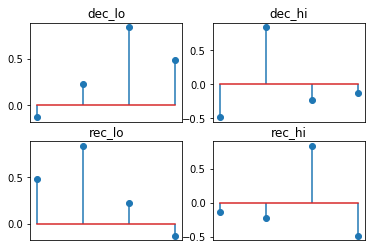

In [36]:
filt_type = ["dec_lo", "dec_hi", "rec_lo", "rec_hi"]
for index in range(4):
    ax = plt.subplot(2, 2, index + 1)
    plt.stem(range(4), fb[index], use_line_collection = True)
    plt.title(filt_type[index])
    ax.axes.get_xaxis().set_visible(False)
plt.show()

As well for the corresponding scaling and wavelet functions:

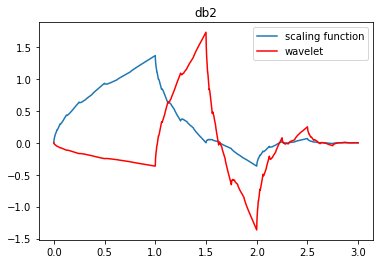

In [37]:
(phi, psi, x) = w.wavefun(level=10)
plt.plot(x, phi, label = "scaling function")
plt.plot(x, psi, 'r', label = "wavelet")
plt.legend()
plt.title(w.name)
plt.show()

Please visit: http://wavelets.pybytes.com/wavelet/db2/ for a more complete overview. 

**Question 6** *(2 points)*. Visualize the results obtained by replacing in Question 5 `'Haar'` by `'db2'`. *(This reproduces the figures in the course at slides 209-210)*

itération n°0 (nombre de points : 1024)
Espace d'approximation 10 :


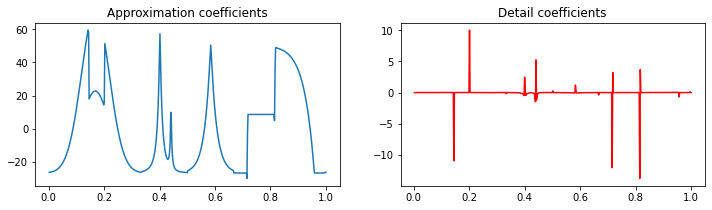

itération n°1 (nombre de points : 512.0)
Espace d'approximation 9 :


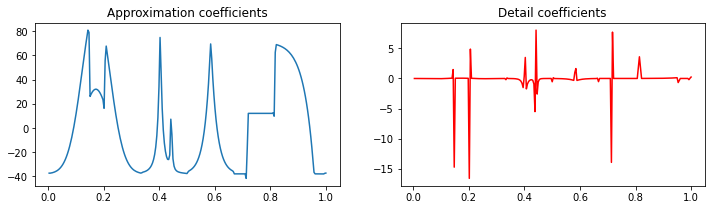

itération n°2 (nombre de points : 256.0)
Espace d'approximation 8 :


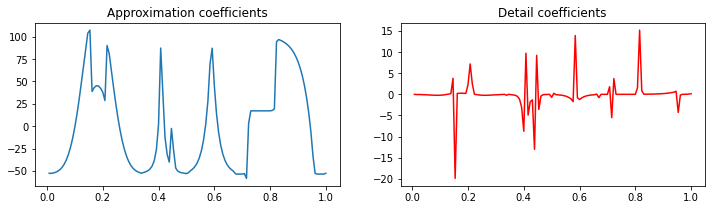

itération n°3 (nombre de points : 128.0)
Espace d'approximation 7 :


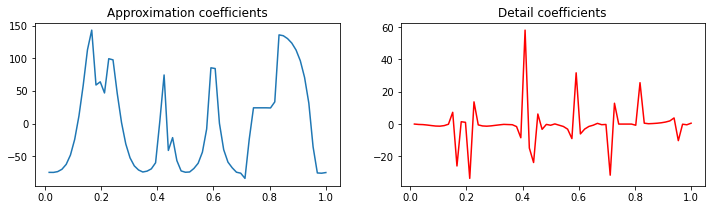

itération n°4 (nombre de points : 64.0)
Espace d'approximation 6 :


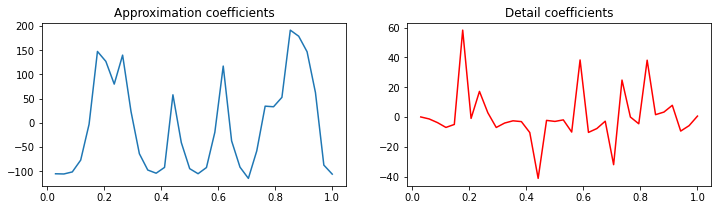

itération n°5 (nombre de points : 32.0)
Espace d'approximation 5 :


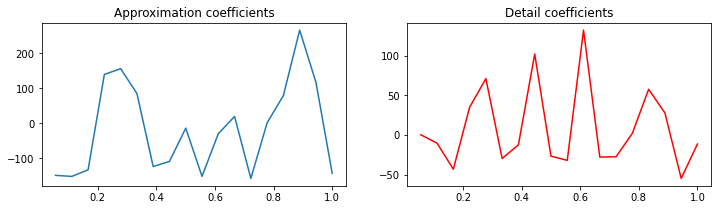

itération n°6 (nombre de points : 16.0)
Espace d'approximation 4 :


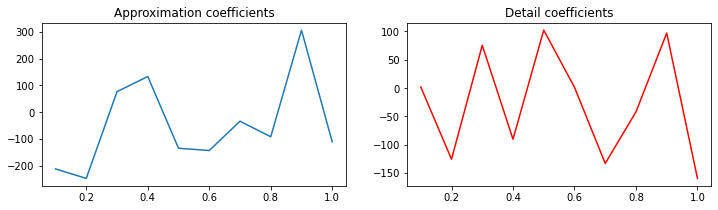

itération n°7 (nombre de points : 8.0)
Espace d'approximation 3 :


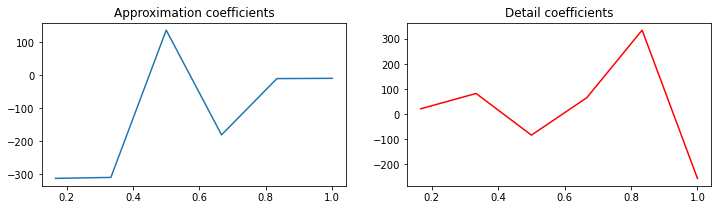

itération n°8 (nombre de points : 4.0)
Espace d'approximation 2 :


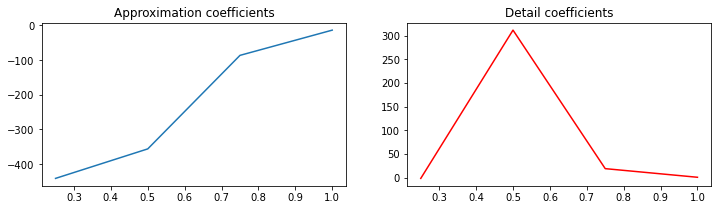

itération n°9 (nombre de points : 2.0)
Espace d'approximation 1 :


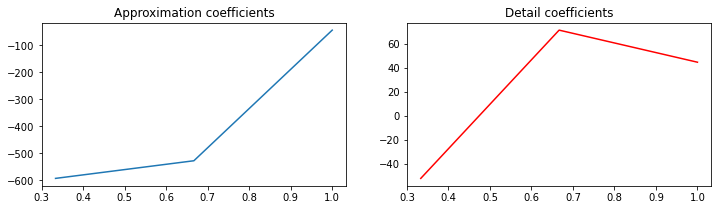

In [51]:
n = 1024
f = pywt.data.demo_signal('Piece-Regular', n)
t = np.arange(1, n + 1)/n

J = 10
k = 1
pile = list()
for j in range(J):
    print(f"itération n°{j} (nombre de points : {n})")
    print(f"Espace d'approximation {J-j} :")
    n = n/2
    f, details = pywt.dwt(f, 'db2')
    pile.append(details)
    f = f
    details = details
    t = np.arange(1, len(f)+1)/len(f)
    plt.figure(figsize=(12, 3))
    # Ca serai bien d'afficher "details" comme dans le cours
    #plt.step(np.concatenate(([0.], t)), np.concatenate(([f[0]],f)))
    plt.subplot(121)
    plt.plot(t, f)
    plt.title("Approximation coefficients")
    plt.subplot(122)
    plt.plot(t, details, color='red')
    plt.title("Detail coefficients")
    plt.show()

### Signal compression and reconstruction

**Question 7** *(3 points)*. Write two functions:
* `compression` which keeps the $M$ largest coefficients of a wavelet decomposition and put the others to zero.
* `reconstruction` which reconstruct the signal $\tilde f_M$ from the $M$ largest coefficients with `pywt.waverec` and compute the $L_2$ relative error with the original signal $f$, that is $\epsilon(M)=\frac{\|f-\tilde f_M\|_2}{\|f\|_2}$

*Hint:* You might need the following commands: 
* `np.ravel` (see doc: https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)
* `pywt.coeffs_to_array` and `pywt.array_to_coeffs` (see doc: https://pywavelets.readthedocs.io/en/latest/ref/dwt-coefficient-handling.html)

Then apply `compression` and `reconstruction` to the `Piece-regular` function with the Daubechies wavelet `db2` and the following parameters:

In [38]:
n = 1024
f = pywt.data.demo_signal('Piece-Regular', n)
t = np.arange(1, n + 1)/n
ratio = 7.5/100
M = int(ratio * n)
compressFactor = 1 - ratio

**(Bonus)** *(1 point)* Same question with the function $x\mapsto \sqrt{|\cos(2\pi x)|}$ *(slide 212)* but now for different compression factors: plot the curve of the error $M\mapsto\epsilon(M)$ in the log-log scale using `plt.loglog`. What do you observe? Conclude.

## 2-D Discrete Wavelet Transform

### 2-D Multi-resolution analysis

Now we will perform a 2-D MRA onto images and use their decomposition to compress and denoise them.

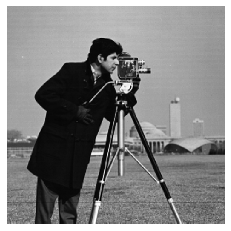

In [39]:
f = pywt.data.camera()
n = f.shape[0] # size of the image
plt.imshow(f, cmap='gray')
plt.axis('off');

The documentation of PyWavelet clearly explains below how to compute the 2-D multi-scale analysis (source: https://pywavelets.readthedocs.io/en/latest/ref/2d-decompositions-overview.html):

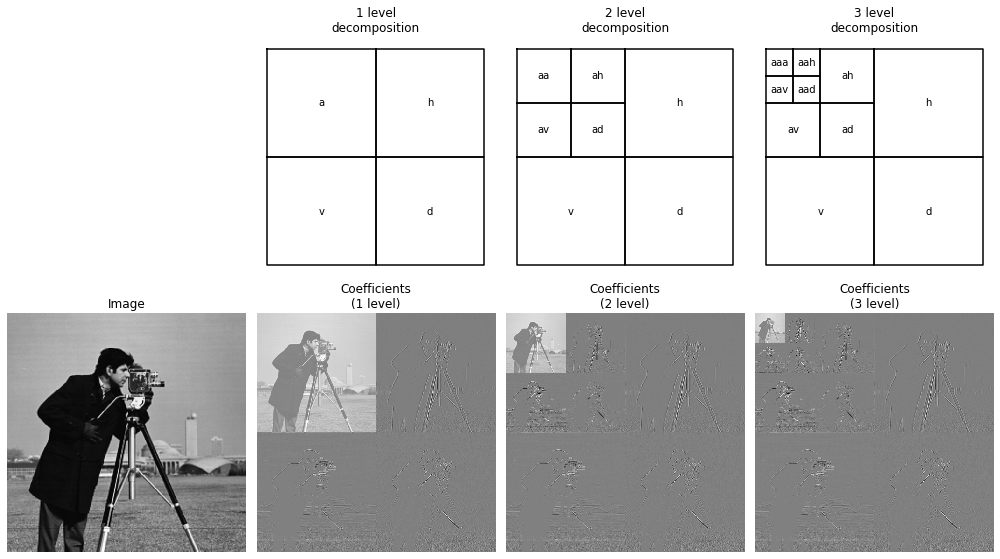

In [40]:
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x = pywt.data.camera().astype(np.float32)
shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

*Remark*. The notation is quite different from that of the course, in which the initial image is denoted by $C_9$ (since the size is $n=2^9=512$) and the indices of the coarser spaces decrease as follows *(notation `Dj_i` corresponds to $D_j^i$ in slide 215)*:

In [41]:
C6, (D6_2, D6_1, D6_3), (D7_2, D7_1, D7_3), (D8_2, D8_1, D8_3) = c

For example, the finest horizontal details (on the bottom left in the aboved last image) correspond to coefficients $D_8^1$:

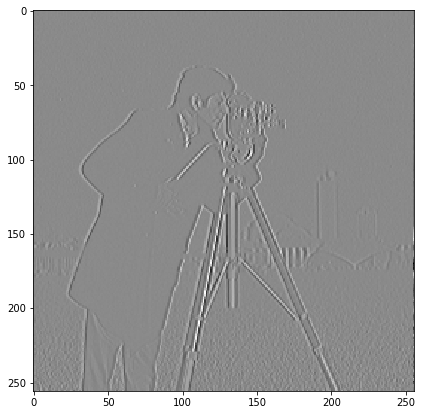

In [42]:
plt.figure(figsize=(7,7))
plt.imshow(D8_1, cmap=plt.cm.gray)
plt.show()

From these coefficients we are able to reconstruct the original image by `pywt.waverec2` (see documentation: https://pywavelets.readthedocs.io/en/latest/ref/nd-dwt-and-idwt.html#multilevel-reconstruction-waverecn)

### Image compression

**Question 8** *(2 points)*. Use the `compression` function which keeps the $M$ largest coefficients and reconstruct the compressed image with `pywt.waverec2`. Compute the PSNR with the original image and highlight the non-zeros coefficients in the multi-level decomposition plot.

In [43]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

You will use these parameters:

In [44]:
ratio = 1.5/100
M = int(ratio * n**2)
compressFactor = 1 - ratio

### Image Denoising

**Question 9** *(2 points)*. Plot with `plt.semilogy` the decrease of the wavelet coefficients (sorted in absolute values) for the following image and its noisy version. (*hint: use the command `pywt.ravel_coeffs` see documentation https://pywavelets.readthedocs.io/en/latest/ref/dwt-coefficient-handling.html#raveling-and-unraveling-coefficients-to-from-a-1d-array*)

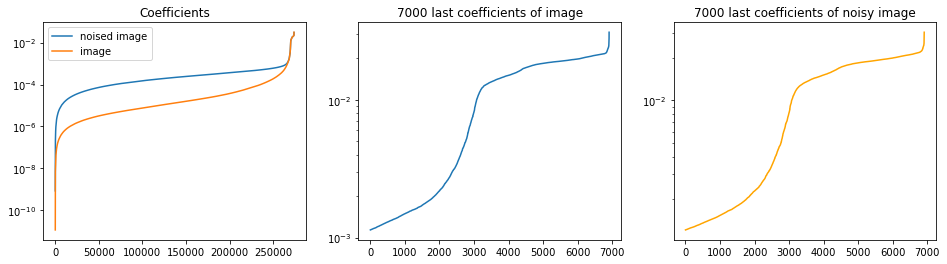

In [52]:
# Initialisation
image = pywt.data.camera().astype(np.float32)
image = image / np.linalg.norm(image, 'fro') # normalization
wavelet = pywt.Wavelet('db4')
levels  = int(np.floor(np.log2(image.shape[0])))
sigma = 0.0003 # noise variance
imageNoisy = image + random.normal(0., sigma, size=image.shape)

# Decomposition
lev = 3
coeffs = pywt.wavedec2(image, wavelet='db4', level=lev)
coeffs_noisy = pywt.wavedec2(imageNoisy, wavelet='db4', level=lev)

arr, _, _ = pywt.ravel_coeffs(coeffs)
arr_noisy, _, _ = pywt.ravel_coeffs(coeffs_noisy)
arr = np.sort(np.abs(arr))
arr_noisy = np.sort(np.abs(arr_noisy))

# Plot
x = np.arange(1, len(arr)+1)
plt.figure(figsize=[16,4])
plt.subplot(131)
plt.title("Coefficients")
plt.semilogy(arr_noisy, label="noised image")
plt.semilogy(arr, label="image")
plt.legend()

plt.subplot(132)
plt.semilogy(arr[267000:])
plt.title("7000 last coefficients of image")

plt.subplot(133)
plt.semilogy(arr_noisy[267000:], color='orange')
plt.title("7000 last coefficients of noisy image")

plt.show()


Now we will apply a threshold to these coefficients in order to reduce the amount of noise. Two types of thresholding will be investigated:
* Hard thresholding
* Soft thresholding

It requires the use of the `pywt.threshold` command (see documentation: https://pywavelets.readthedocs.io/en/latest/ref/thresholding-functions.html)

Text(0, 0.5, 'thresholded value')

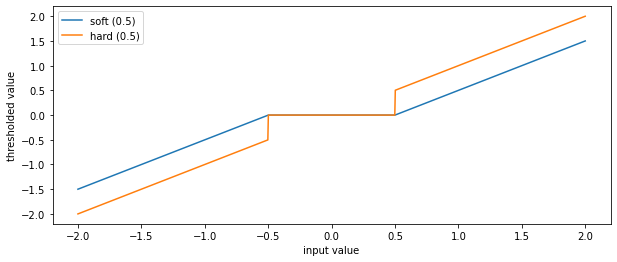

In [126]:
s = np.linspace(-2, 2, 1000)
s_soft = pywt.threshold(s, value = 0.5, mode = 'soft')
s_hard = pywt.threshold(s, value = 0.5, mode = 'hard')
plt.figure(figsize = (10, 4))
plt.plot(s, s_soft)
plt.plot(s, s_hard)
plt.legend(['soft (0.5)', 'hard (0.5)'])
plt.xlabel('input value')
plt.ylabel('thresholded value')

**Question 10** *(3 points)*. Write two functions which respectively denoise a 1-D signal and a 2-D image by applying a soft threshold $T$ on the wavelet coefficients, whose value is fixed to $T=\widehat \sigma \sqrt{2\log n}$. An estimator $\widehat \sigma$ of the true noise variance $\sigma$ (see variable `sigma`) is given by the median of the wavelet coefficients at the finest scale. Then, reconstruct the signal/image and plot the noisy et denoised version (on the same plot for signals and side-by-side for images). Experiment with `imageNoisy` (above) and `signalNoisy` (below) and try different wavelets (e.g `db4`).

Valeur de sigma_h :  1.2769590423747443
Valeur du Treshold : 4.754498296502309


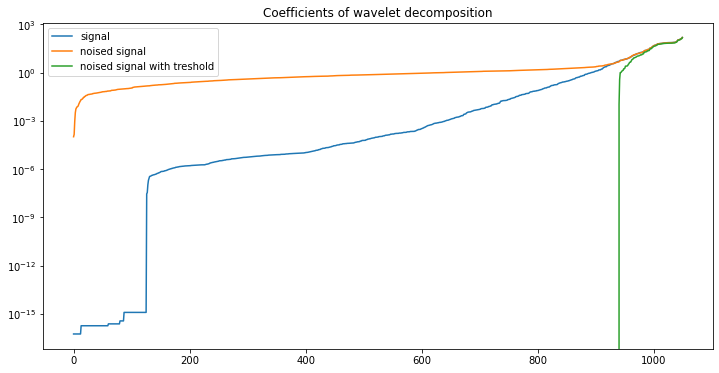

Erreur moyenne du signalNoisy : 0.7754491037701609
Erreur moyenne du signalRec: 1.3581099958795855
Norme de (sN-sR) : 59.51717361010466


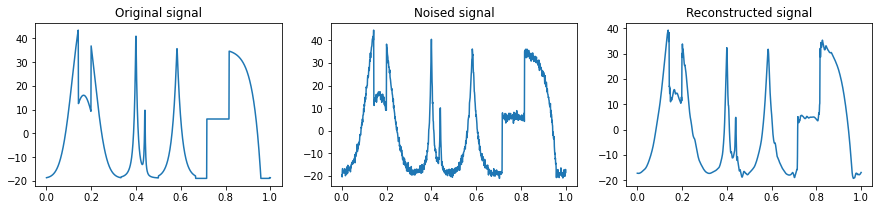

In [64]:
def denoising(name, sigma, t_type):
    n = 1024
    t = np.arange(1, n + 1)/n
    signal = pywt.data.demo_signal(name, n)        # try also with 'Doppler'
    # sigma = 0.03 for 'Doppler'            
    signalNoisy = signal + sigma * random.standard_normal(n)

    #Decomposition
    lev=4
    coeffs = pywt.wavedec(signalNoisy, wavelet='db4', level=lev)
    coeffs_sig = pywt.wavedec(signal, wavelet='db4', level=lev)
    arr_sig, _, _ =  pywt.ravel_coeffs(coeffs_sig)
    arr, coeff_slices, coeff_shapes =  pywt.ravel_coeffs(coeffs)

    #Compute Threshold value
    ca = coeffs[0]
    cd_finest = coeffs[1]
    cd_finest = np.sort(np.abs(cd_finest))
    med = int(len(cd_finest)/2)
    sigma_h = abs(cd_finest[med])
    #sigma_h = 1
    print("Valeur de sigma_h : ", sigma_h)
    T=sigma_h*sqrt(2*log(n))
    print(f"Valeur du Treshold : {T}")

    #Apply Treshold
    arr_Ts = pywt.threshold(arr, value = T, mode = t_type)

    arr = np.sort(np.abs(arr))
    arr_Ts_sorted = np.sort(np.abs(arr_Ts))
    arr_sig = np.sort(np.abs(arr_sig))

    #Plot Coefficient
    plt.figure(figsize=[12,6])
    plt.semilogy(arr_sig, label="signal")
    plt.semilogy(arr, label="noised signal")
    plt.semilogy(arr_Ts_sorted, label="noised signal with treshold")
    plt.legend()
    plt.title("Coefficients of wavelet decomposition")
    plt.show()

    # Reconstruct signal
    coeffs_Ts = pywt.unravel_coeffs(arr_Ts, coeff_slices, coeff_shapes, output_format="wavedec")
    signalRec = pywt.waverec(coeffs_Ts, 'db4')

    # Calcul error
    norm=0
    err_n=0 ; var_n=0;
    err_r=0 ; var_r=0;
    diff = signalNoisy-signalRec
    for d, s, noise, rec in zip(diff, signal, signalNoisy, signalRec):
        err_n += abs(s-noise)
        err_r += abs(s-rec)
        norm += d*d
    for s, noise, rec in zip(signal, signalNoisy, signalRec):
        var_n += (abs(noise-s)-(err_n/n) )**2
        var_r += (abs(rec-s)-(err_r/n)**2 )**2
    print(f'Erreur moyenne du signalNoisy : {err_n/n}')
    print(f'Erreur moyenne du signalRec: {err_r/n}')
    print(f'Norme de (sN-sR) : {sqrt(norm)}')

    # Plot signal
    plt.figure(figsize=[15, 3])
    plt.subplot(131)
    plt.title("Original signal")
    plt.plot(t, signal)
    plt.subplot(132)
    plt.title("Noised signal")
    plt.plot(t, signalNoisy)
    plt.subplot(133)
    plt.title("Reconstructed signal")
    plt.plot(t, signalRec)

    plt.show()
    
denoising('Piece-Regular', 1., "soft")

Valeur de sigma_h :  0.025228132189971806
Valeur du Treshold : 0.0939318392687771


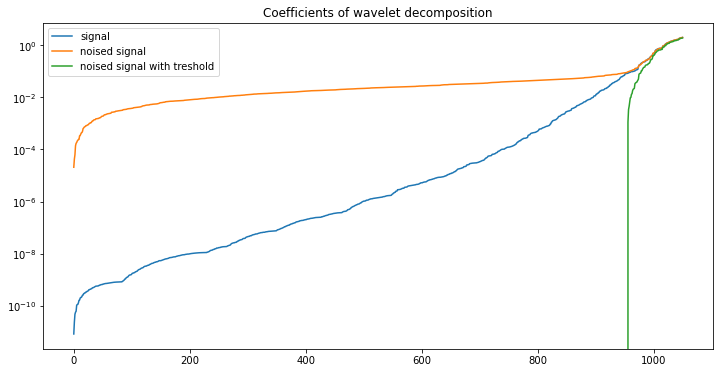

Erreur moyenne du signalNoisy : 0.024322102227103178
Erreur moyenne du signalRec: 0.025478839029469662
Norme de (sN-sR) : 1.336497443060851


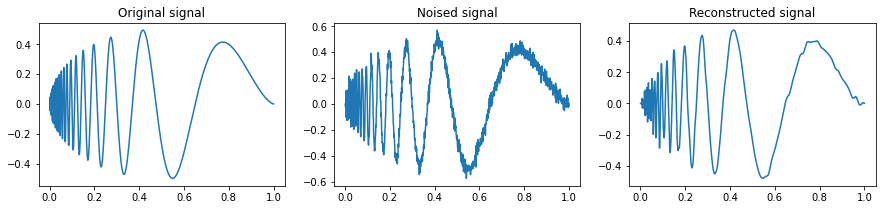

In [57]:
denoising("Doppler", 0.03, "soft")

By using a threshold on wavelet coefficient, we can denoinse a signal keeping the higher values. We observe that the result is smotther we will have the same order of error for Noised signal and reconstructed signal. It is explained by the fact that we cannot regain information which has been lost by the noise.

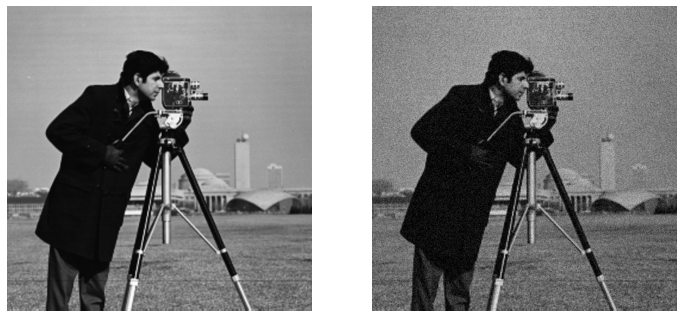

Valeur de sigma_h :  0.0005248914537340538
Valeur du Treshold : 0.002622004800981323


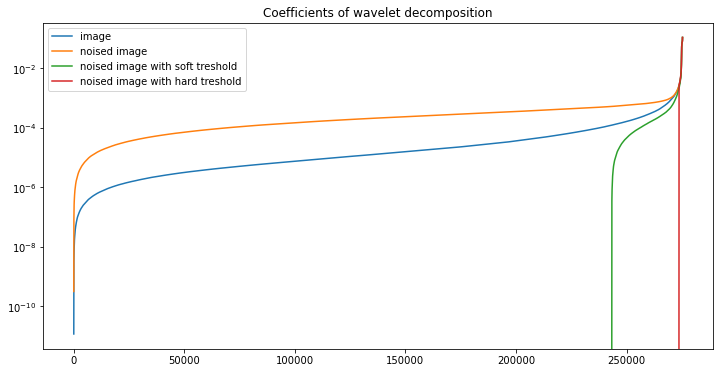

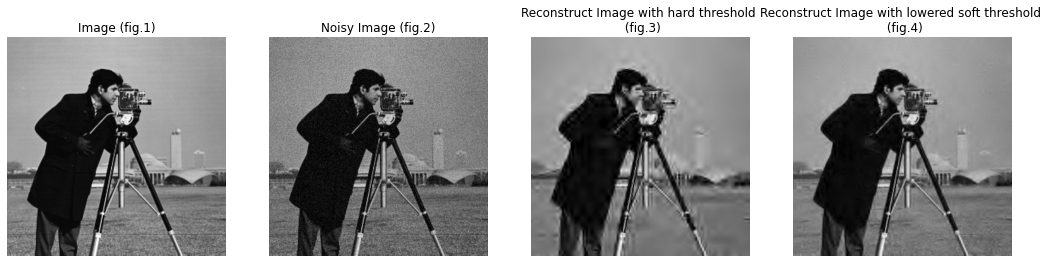

In [67]:
image = pywt.data.camera().astype(np.float32)
image = image / np.linalg.norm(image, 'fro') # normalization
n = len(image) * len(image[0])
wavelet = pywt.Wavelet('db4')
levels  = int(np.floor(np.log2(image.shape[0])))
sigma = 0.0003 # noise variance
imageNoisy = image + random.normal(0., sigma, size=image.shape)
plt.figure(figsize=[12,6])
plt.subplot(122)
plt.imshow(np.clip(imageNoisy,0,255), cmap='gray');plt.axis('off');
plt.subplot(121)
plt.imshow(np.clip(image,0,255), cmap='gray');plt.axis('off');
plt.axis('off')
plt.show()

# Decomposition
lev=5
coeffs = pywt.wavedec2(imageNoisy, wavelet='db4', level=lev)
coeffs_sig = pywt.wavedec2(image, wavelet='db4', level=lev)
arr, coeff_slices, coeff_shapes =  pywt.ravel_coeffs(coeffs)
arr_sig, _, _ =  pywt.ravel_coeffs(coeffs_sig)

# Compute Threshold
ca = coeffs[0]
cd_finest = coeffs[1]
c0 = np.concatenate(cd_finest[0])
c1 = np.concatenate(cd_finest[1])
c2 = np.concatenate(cd_finest[2])
cd = np.sort(np.abs(np.concatenate([c0, c1, c2])))

med = int(len(cd)/2)
sigma_h = abs(cd[med])
print("Valeur de sigma_h : ", sigma_h)
T=sigma_h*sqrt(2*log(n))
print(f"Valeur du Treshold : {T}")

# Apply Treshold
arr_Th = pywt.threshold(arr, value = T, mode = 'hard')
arr_Ts = pywt.threshold(arr, value = T/5, mode = 'soft')

arr = np.sort(np.abs(arr))
arr_Th_sorted = np.sort(np.abs(arr_Th))
arr_Ts_sorted = np.sort(np.abs(arr_Ts))
arr_sig = np.sort(np.abs(arr_sig))

# Plot Coeffs
plt.figure(figsize=[12,6])
plt.semilogy(arr_sig, label="image")
plt.semilogy(arr, label="noised image")
plt.semilogy(arr_Ts_sorted, label="noised image with soft treshold")
plt.semilogy(arr_Th_sorted, label="noised image with hard treshold")
plt.legend()
plt.title("Coefficients of wavelet decomposition")
plt.show()

# Reconstruction
coeffs_Ts = pywt.unravel_coeffs(arr_Ts, coeff_slices, coeff_shapes, output_format="wavedec2")
imageRec = pywt.waverec2(coeffs_Ts, 'db4')

coeffs_Th = pywt.unravel_coeffs(arr_Th, coeff_slices, coeff_shapes, output_format="wavedec2")
imageRec_hard = pywt.waverec2(coeffs_Th, 'db4')

# Plot
plt.figure(figsize=[18, 6])
plt.subplot(141)
plt.title("Image (fig.1)")
plt.imshow(np.clip(image,0,255), cmap='gray');plt.axis('off');
plt.subplot(142)
plt.title("Noisy Image (fig.2)")
plt.imshow(np.clip(imageNoisy,0,255), cmap='gray');plt.axis('off');
plt.subplot(143)
plt.title("Reconstruct Image with hard threshold \n (fig.3)")
plt.imshow(np.clip(imageRec_hard,0,255), cmap='gray');plt.axis('off');
plt.subplot(144)
plt.title("Reconstruct Image with lowered soft threshold \n (fig.4)")
plt.imshow(np.clip(imageRec,0,255), cmap='gray');plt.axis('off');

plt.show()

Using the threshold value computed from $\hat{\sigma}$, only the coefficient which are the same as the original image will be kept. It results that too few coefficients are kept, and the result is blur (fig.3). We can lower a bit the threshold value and use a soft treshold to obraing a better result (fig.4).